# Support Vector Machines

* A support vector machine (SVM) is a powerful and versatile machine learning model, capable of performing linear or nonlinear classification, regression, and even novelty detection.

* SVM is great for small to medium-sized nonlinear datasets (i.e., hundreds to thousands of instances), especially for classification tasks. However, they don't scale very well to very large datasets.

# A. Linear SVM Classification:

* Think of an SVM classifier as fitting the widest possible street between classes. (*Large Margin Classification*).
* SVMs are sensitive to the feature scales.
* If your SVM model is overfitting, you can try regularizing it by reducing `C`.

### A.1. Soft Margin Classification:

* Hard Margin Classification:
    * impose that all instances must be off the street and on the correct side.
    * 2 main issues w/ hard margin classification:
        * It only works if the data is linearly separable.
        * It is sensitive to outliers.

* Soft Margin Classification:
    * The objective is to find a good balance between keeping the street as large as possible and limiting the *margin violations* (i.e., instances that end up in the middle of the street or even on the wrong side).
    * When creating an SVM model using sklearn, you can specify hyperparameters, including the regularization hyperparameter `C`.
        * $\uparrow$ `C`: $\downarrow$ Street Width
        * $\downarrow$ `C`: $\uparrow$ Street Width, but leads to more margin violations.
            * Reducing `C` Results in more instances supporting the street, so there's less risk of overfitting. But if you reduce it too much, then the model ends up underfitting.

* Unlike `LogisticRegression`, `LinearSVC` doesn’t have a `predict_proba()` method to estimate the class probabilities.
    * If you use `SVC` calss instead of `LinearSVC`, and if you set its `probability` hyperparameter to `True`, then the model will fit an extra model at the end of the training to map the SVM decision function scores to estimated probabilities.
    * Under the hood, this requires using 5-fold cv to generate out-of-sample predictions for every instance in the training set, then training a `LogisticRegression` model, so it will slow down training considerably.
    * After that, the `predict_proba()` and `predict_log_proba()` methods will be available.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [46]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42, dual='auto'))

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual='auto', random_state=42))])

In [47]:
y_pred = svm_clf.predict(X_test)

In [48]:
svm_clf.decision_function(X_test)

array([-1.06631748,  0.34523788, -0.43205298, -1.62719797, -4.99996421,
       -5.28601694, -0.57133769, -5.494944  ,  0.97950238, -1.13595984,
        1.32023083,  1.54786618,  1.82269394, -5.63422871, -0.29276828,
       -5.3556593 , -5.56458636, -1.3448869 , -0.71436406,  0.27559553,
       -0.6447217 ,  2.10874667, -0.57133769, -0.01794052,  1.68340923,
       -2.33110482, -1.55755562, -5.70761272,  0.763092  , -4.64801078])

# B. Nonlinear SVM Classification:

* Although linear SVM classifiers are efficient and often work surprisingly well, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset.

''

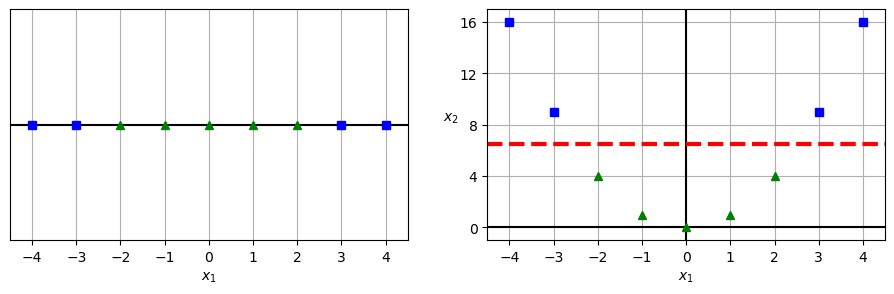

In [50]:
# Adding features to make a dataset linearly separable

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
;